Training first RBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -90.73, time = 39.60s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 2, pseudo-likelihood = -85.35, time = 43.98s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 3, pseudo-likelihood = -87.18, time = 43.33s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 4, pseudo-likelihood = -83.64, time = 52.48s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.70, time = 41.95s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.03, time = 43.32s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 7, pseudo-likelihood = -78.40, time = 41.38s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.76, time = 40.73s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.04, time = 43.78s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


[BernoulliRBM] Iteration 10, pseudo-likelihood = -86.35, time = 50.15s
Training second RBM...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -36.31, time = 4.39s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -33.96, time = 6.39s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -30.88, time = 5.79s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -29.80, time = 6.95s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -30.83, time = 5.50s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -29.47, time = 6.12s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -29.40, time = 5.68s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -29.96, time = 5.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -29.74, time = 6.36s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -28.87, time = 5.40s


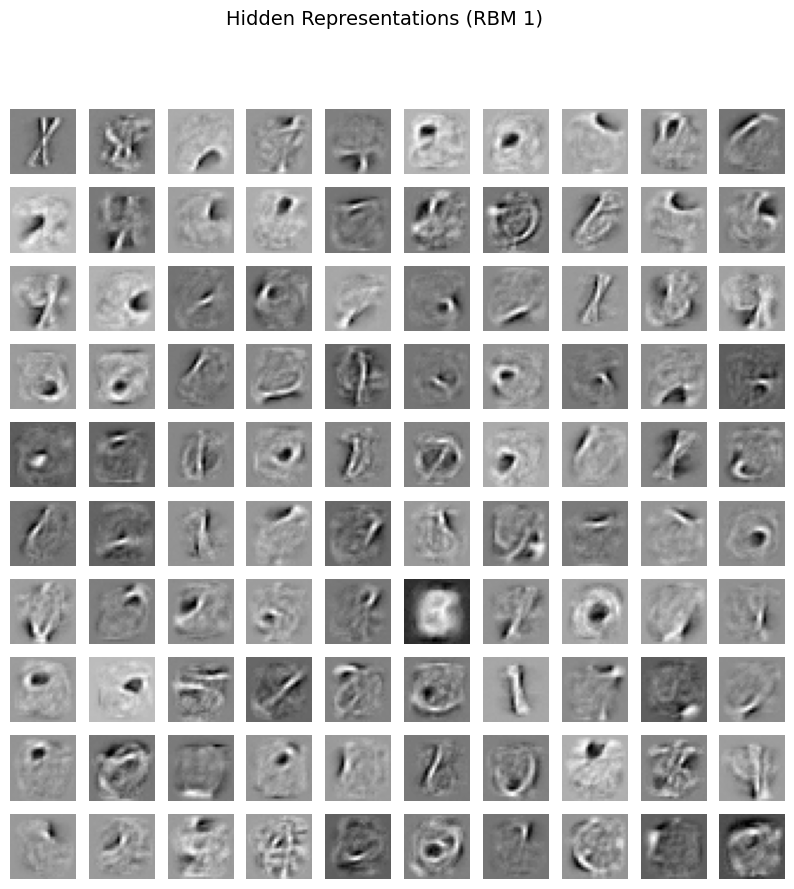


Feature shapes:
Train hidden layer 1: (56000, 256)
Test hidden layer 1: (14000, 256)
Train hidden layer 2: (56000, 128)
Test hidden layer 2: (14000, 128)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser="auto")
X = (X > 128).astype(float)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
rbm1 = BernoulliRBM(n_components=256, learning_rate=0.05, n_iter=10, verbose=True)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.05, n_iter=10, verbose=True)
print("Training first RBM...")
rbm1.fit(X_train)
hidden1_train = rbm1.transform(X_train)
hidden1_test = rbm1.transform(X_test)
print("Training second RBM...")
rbm2.fit(hidden1_train)
hidden2_train = rbm2.transform(hidden1_train)
hidden2_test = rbm2.transform(hidden1_test)
def visualize_hidden_units(rbm, n_cols=10, n_rows=10):
    """Visualize learned features (weights) of an RBM."""
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        if i >= rbm.components_.shape[0]: break
        ax.imshow(rbm.components_[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle("Hidden Representations (RBM 1)", fontsize=14)
    plt.show()
visualize_hidden_units(rbm1)
print("\nFeature shapes:")
print(f"Train hidden layer 1: {hidden1_train.shape}")  # (56000, 256)
print(f"Test hidden layer 1: {hidden1_test.shape}")    # (14000, 256)
print(f"Train hidden layer 2: {hidden2_train.shape}")  # (56000, 128)
print(f"Test hidden layer 2: {hidden2_test.shape}")    # (14000, 128)









In [ ]:
import numpy as np
class RBM:
    def __init__(self, visible_units, hidden_units, learning_rate=0.1):
        self.v = visible_units
        self.h = hidden_units
        self.lr = learning_rate
        self.W = np.random.normal(0, 0.1, (self.v, self.h))
        self.b = np.zeros(self.v)  # Visible bias
        self.c = np.zeros(self.h)  # Hidden bias
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sample_h(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.c)
        return (np.random.rand(self.h) < prob_h).astype(np.float32), prob_h
    def sample_v(self, h):
        prob_v = self.sigmoid(np.dot(h, self.W.T) + self.b)
        return (np.random.rand(self.v) < prob_v).astype(np.float32), prob_v
    def train(self, data, epochs=1000):
        for epoch in range(epochs):
            v0 = data
            h0, _ = self.sample_h(v0)
            v1, _ = self.sample_v(h0)
            h1, _ = self.sample_h(v1)
            self.W += self.lr * (np.outer(v0, h0) - np.outer(v1, h1))
            self.b += self.lr * (v0 - v1)
            self.c += self.lr * (h0 - h1)
    def reconstruct(self, v):
        h, _ = self.sample_h(v)
        v_recon, _ = self.sample_v(h)
        return v_recon
# Example usage
data = np.array([1, 0, 1, 0, 1, 0])  # Example input
rbm = RBM(visible_units=6, hidden_units=3)
rbm.train(data, epochs=500)
print("Reconstructed data:", rbm.reconstruct(data))

Reconstructed data: [1. 0. 1. 0. 1. 0.]
